<a href="https://colab.research.google.com/github/francisrod01/ML_face_recognition/blob/main/ML_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face recognition API for Python

source: https://github.com/ageitgey/face_recognition

related: https://github.com/ageitgey/face_recognition/blob/master/examples/facerec_from_webcam_faster.py


In [15]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Make known and unknown directories

In [13]:
!mkdir known unknown

Now upload your images (left click on files, import into the right folders)

Base models in known with name as file name
Pictures of these people in unknown

In [113]:
from PIL import Image, ImageDraw, ImageFont
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition
import os
import cv2

In [128]:
# list fonts
font_path = os.path.join(cv2.__path__[0],'qt','fonts')
!ls $font_path

DejaVuSans-BoldOblique.ttf	     DejaVuSansCondensed.ttf
DejaVuSans-Bold.ttf		     DejaVuSans-ExtraLight.ttf
DejaVuSansCondensed-BoldOblique.ttf  DejaVuSans-Oblique.ttf
DejaVuSansCondensed-Bold.ttf	     DejaVuSans.ttf
DejaVuSansCondensed-Oblique.ttf


In [135]:
def draw_rec(url1, url2, url3):
  # This is an example of running face recognition on a single image
  # and drawing a box around each person that was identified.

  # Load a sample picture and learn how to recognize it.
  obama_image = face_recognition.load_image_file(url1)
  obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

  # Load a second sample picture and learn how to recognize it.
  biden_image = face_recognition.load_image_file(url2)
  biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

  # Create arrays of known face encodings and their names
  known_face_encodings = [
      obama_face_encoding,
      biden_face_encoding
  ]
  known_face_names = [
      "Trump",
      "Kim"
  ]

  # Load an image with an unknown face
  unknown_image = face_recognition.load_image_file(url3)

  # Find all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
  # See http://pillow.readthedocs.io/ for more about PIL/Pillow
  pil_image = Image.fromarray(unknown_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Drawing Text on Images with Pillow and Python
  # See https://www.blog.pythonlibrary.org/2021/02/02/drawing-text-on-images-with-pillow-and-python/
  _font_path = os.path.join(font_path,'DejaVuSans.ttf')
  label_font = ImageFont.truetype(_font_path, size=30)
  print('label font:', label_font)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      # If a match was found in known_face_encodings, just use the first one.
      if True in matches:
          first_match_index = matches.index(True)
          name = known_face_names[first_match_index]

      # Draw a box around the face using the Pillow module
      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      # Draw a label with a name below the face
      text_width, text_height = draw.textsize(name)
      # label_font = ImageFont.truetype("Gidole-Regular.ttf", 10)
      print('text width:' , text_width)
      print('text height:' , text_height)
      print('bottom:' , bottom)
      top_left_x = (left + text_width)
      top_left_y = (bottom - text_height)
      draw.rectangle(((left, top_left_y - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((top_left_x + 6, top_left_y - 20), name, font=label_font, fill=(255, 255, 255, 255))
      # text_width, text_height = draw.textsize(name)
      # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      # draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


  # Remove the drawing library from memory as per the Pillow docs
  del draw

  # Display the resulting image
  plt.figure(figsize = (12, 8))
  # plt.imshow(pil_image, interpolation='nearest', aspect='auto')
  plt.imshow(pil_image, aspect='auto')

  # You can also save a copy of the new image to disk if you want by uncommenting this line
  # pil_image.save("image_with_boxes.jpg")

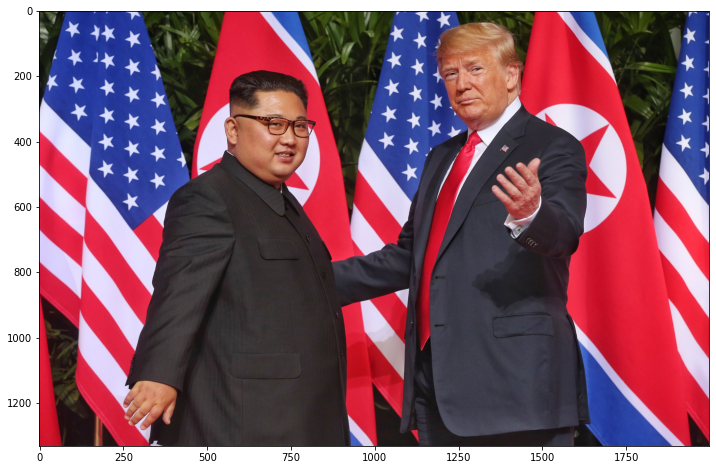

In [107]:
plt.figure(figsize = (12, 8))
plt.imshow(Image.fromarray(face_recognition.load_image_file("unknown/kim_and_trump_3.jpg")), aspect='auto')
# plt.imshow(Image.fromarray(face_recognition.load_image_file("unknown/kim_and_trump.jpg")), aspect='auto')

label font: <PIL.ImageFont.FreeTypeFont object at 0x7ff599ac0110>
text width: 18
text height: 11
bottom: 489
text width: 30
text height: 11
bottom: 316


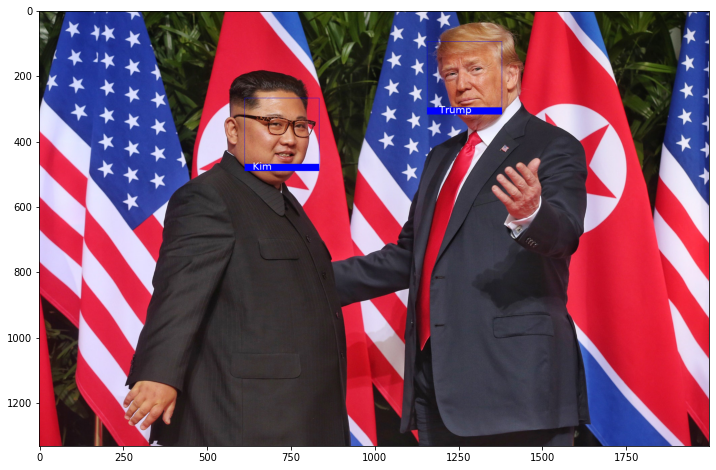

In [134]:
draw_rec("known/Donald Trump.jpg", "known/Kim_Jong-un.jpg", "unknown/kim_and_trump_3.jpg")